## Predicting if a customer is happy 😃 or not based 😟 on the answers they give to questions asked.

The CSV file contains 7 features. The Y value will be a binary happiness value while the other features are integers from 1-5.  These attributes are as follows:

* `X1` - The order was delivered on time
* `X2` - The contents of the order was as expected
* `X3` - Ordered everything they wanted to
* `X4` - Paid a good price for the order
* `X5` - Satisfied with the order
* `X6` - The app made ordering easy


**Further analysis will be done to learn which attributes most significantly affect customer happiness**

### Importing Modules and Data

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import random
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score


In [2]:
data = pd.read_csv("ACME-HappinessSurvey2020.csv")
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.columns = ['happinessStatus', 'onTime', 'expectedContents', 
                'allOrdered', 'goodPrice', 'orderSatisfication', 'easyOrdering']
data.head()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Visualize the data

In [4]:
data.describe()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
def resultsReport(actual, predictions) :
    
    # Print F1 Score
    print('F1 Score ', f1_score(actual, predictions))
    
    # Visualize classification report with precision, recall and F1 score
    print(classification_report(actual, predictions))

    # Create Confusion matrix vector
    confMatrix = confusion_matrix(actual, predictions)
    dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])

    # Plot Confusion matrix
    sn.heatmap(dfConfMatrix, annot = True)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
def analyzeAttribute(data, colName) :
    # Display Average
    print("Average " + colName + " value: ", data[colName].mean())
    
    # Plot histogram
    bins = np.arange(1,7) - 0.5
    plt.hist(data[colName], bins)
    plt.title(colName)
    plt.show()

Average onTime value:  4.333333333333333


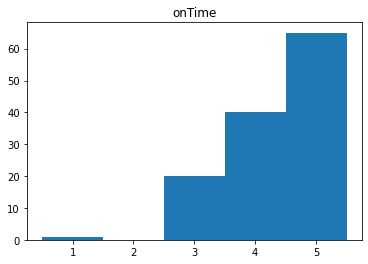

Average expectedContents value:  2.5317460317460316


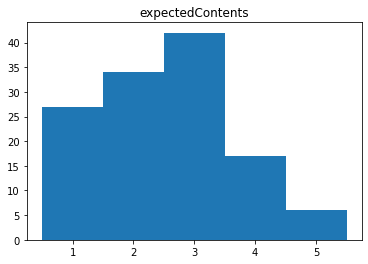

Average allOrdered value:  3.3095238095238093


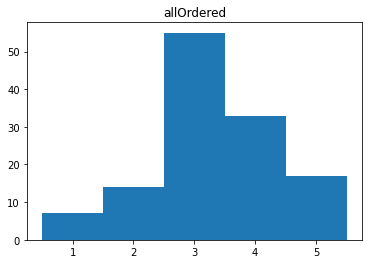

Average goodPrice value:  3.746031746031746


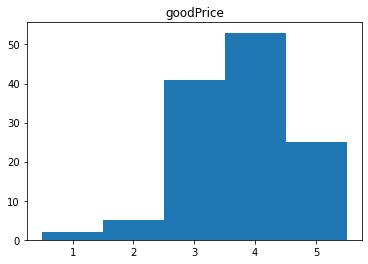

Average orderSatisfication value:  3.6507936507936507


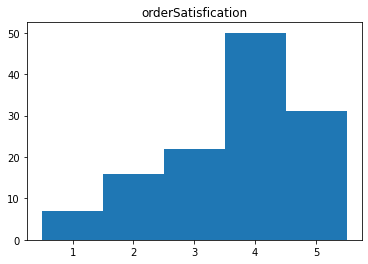

Average easyOrdering value:  4.253968253968254


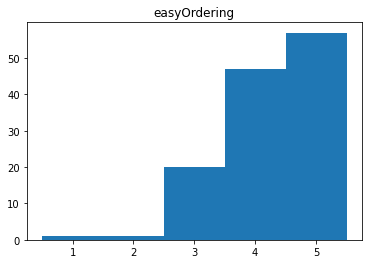

In [7]:
for i in range(1,7):
    analyzeAttribute(data, data.columns[i])

### Preprocess Data

Divide into 80% training, 20% testing

In [8]:
X = data.drop(columns="happinessStatus")
y =data["happinessStatus"]


# split the data into training and testing data 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,
                                                 random_state=0)



In [9]:
print(f"The X_train shape is: {X_train.shape}")
print(f"The X_test shape is: {X_test.shape}")
print(f"The y_train shape is: {y_train.shape}")
print(f"The y_test shape is: {y_test.shape}")

The X_train shape is: (100, 6)
The X_test shape is: (26, 6)
The y_train shape is: (100,)
The y_test shape is: (26,)


### Training Different Models

#### 1) K Nearest Neighbours(KNN)

23 0.7499999999999999


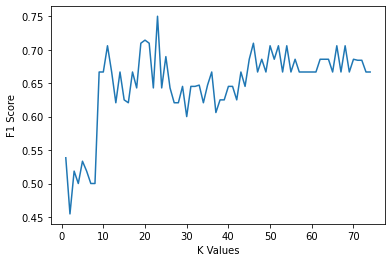

In [10]:
from sklearn.neighbors import KNeighborsClassifier

krange =range(1,75)
results = []

# test out a range of different k values
for k in krange:
    KNN =KNeighborsClassifier(n_neighbors= k)
    KNN = KNN.fit(X_train, y_train)
    
    y_predict  =KNN.predict(X_test)
    
    results.append(f1_score(y_test, y_predict))
    
print(results.index(max(results))+1, max(results)) 

plt.plot(range(1, len(results)+1), results)
plt.xlabel("K Values")
plt.ylabel("F1 Score")
plt.show();

F1 Score  0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.64      0.69      0.67        13

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



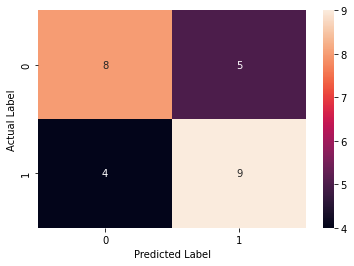

In [11]:
# Recret k nearest neighbours model with max f1 score wher k=10

KNN =KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(X_train, y_train)

y_predict=KNN.predict(X_test)

resultsReport(y_test, y_predict)

### KNN Hyperparameter tuning


Create a new KNN model with different setting combinations. zsettings explored are nearest neighbors, weights, algoroithm, leaf size and power.

In [14]:
# Hyperparameters list
n_neighbors = range(1,20)
weights = ['uniform', 'distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafSize = range(1,30)
power = [1,2]

# Initialize model tracking variables
bestScore = 0
hyperParameterString = ''

# Loop through combinations of hyperparameters
for neigh in n_neighbors :
    for weight in weights :
        for alg in algo :
            for leaf in leafSize :
                for p in power:
                    # Create model with hyperparameter set
                    KNN = KNeighborsClassifier(n_neighbors = neigh,
                                               weights = weight,
                                               algorithm = alg,
                                               leaf_size = leaf,
                                               p = p)
                    # Fit model to training data
                    KNN = KNN.fit(X_train, y_train)

                    # Make predictions on test data
                    yPredict = KNN.predict(X_test)
                    
                    # Check if model scores better than any previous model
                    if f1_score(y_test, y_predict) > bestScore :
                        # Update best score
                        bestScore = f1_score(y_test, y_predict)
                        # Update hyperparameter String to keep track 
                        hyperParameterString = str(neigh) + '_' + weight + '_' + alg + '_' + str(leaf) + '_' + str(p)
                        



# Display results
print(bestScore)
print(hyperParameterString)

0.6666666666666666
1_uniform_auto_1_1


F1 Score  0.6428571428571429
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.60      0.69      0.64        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.62      0.62      0.61        26



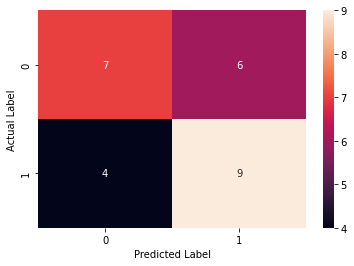

In [16]:
KNN =KNeighborsClassifier(n_neighbors=14,
                         weights="uniform",
                         algorithm="auto",
                         leaf_size=25,
                         p=1)

# fit the model
KNN =KNN.fit(X_train, y_train)

# predict
y_predict =KNN.predict(X_test)

# show results
resultsReport(y_test, y_predict)

### 2. Support Vector Machine (SVM)

F1 Score  0.5517241379310345
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



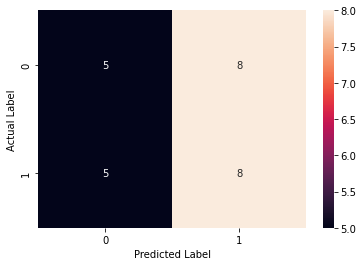

In [25]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create the model
SVM_clf =Pipeline([("scale", StandardScaler()),
              ("SVM", svm.SVC())])

# fit the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# make prediction on test data 
y_predict = SVM_clf.predict(X_test)

# analyze results and display visual output
resultsReport(y_test, y_predict)


### Hyperparameter tuning for SVM


Create SVM models with every type of hyperparameter combination for kernel type, degree and gamma, keep track of F1 scores and output model with best score.

In [26]:
# SVM
# Hyper parameter options
kernelType = ['linear', 'poly', 'rbf', 'sigmoid']#, 'precomputed']
degree = [1, 2, 3, 4] # Only applicable for kernel = poly
gamma = ['scale', 'auto'] # Only applicable for kernel = rbf poly or sigmoid

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

# Loop through hyperparameters and create specific models
for k in kernelType :
    for d in degree :
        for g in gamma :
            
            # Create models with hyper parameter set
            SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                              ('SVM', svm.SVC(kernel=k, degree=d, gamma=g))])
            # Train Model
            SVM_clf  = SVM_clf.fit(X_train, y_train)
            
            # Make predictions on test data set
            y_pred_svm = SVM_clf.predict(X_test)
            
            # Check if model produced a score better than the previous best
            if f1_score(y_test, y_predict) > bestScore :
                # Update best score tracking variable
                bestScore = f1_score(y_test, y_predict)
                # Update hyperparameter string to keep track of settings that produced the best model
                hyperParameterString = k + '_' + str(d) + '_' + g

# Display best model result
print(bestScore)
print(hyperParameterString)

0.5517241379310345
linear_1_scale


F1 Score  0.8000000000000002
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



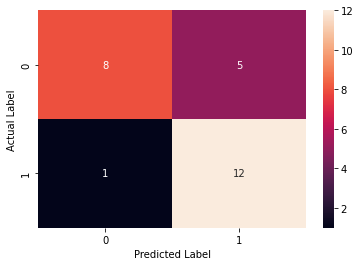

In [27]:
SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])

# train the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# preditc the data
y_predict =SVM_clf.predict(X_test)

# Display results
resultsReport(y_test, y_predict)

### 3. Logistic regression

F1 Score  0.6875
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



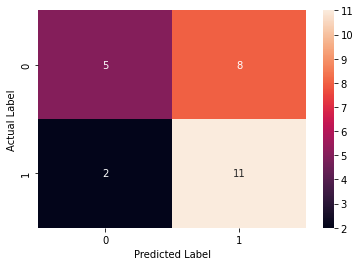

In [29]:
from sklearn.linear_model import LogisticRegression
# create model
logReg = LogisticRegression(max_iter=10000000)

# fit the model
logReg=logReg.fit(X_train, y_train)

# predict the model
y_predict =logReg.predict(X_test)

# Display results
resultsReport(y_test, y_predict)

The logistic regression model performs poorly as its accuracy is 68% and it has a bias towards predicting happy customers (19) versus unhappy customers (7). Due to these resasons this model will not be chosen.

### 4. Gaussian Naive Bays

F1 Score  0.6666666666666667
              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



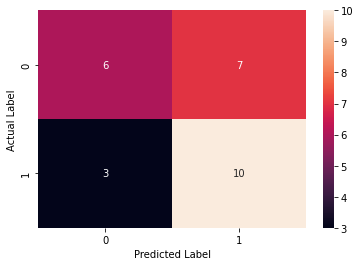

In [30]:
from sklearn.naive_bayes import GaussianNB
# create model
gnb =GaussianNB()

# Train model on trianing dataset
gnb =gnb.fit(X_train, y_train)

# make prediction on test set
y_predict = gnb.predict(X_test)

# Display results
resultsReport(y_test, y_predict)

Similar to logistic regression the model has a lower accuracy and a bias towards predicting happy customers (17 versus 9). This model will be discarded

### 5. Decision Tree

F1 Score  0.48000000000000004
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.50      0.46      0.48        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



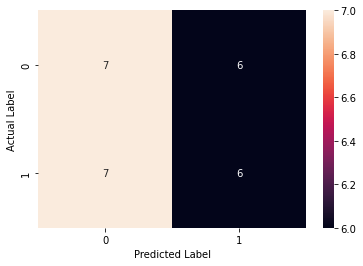

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_dt  =tree.predict(X_test)


resultsReport(y_test, y_pred_dt)

### Decision Tree Hyperparameter Tuning

In [32]:
# Decision Tree
# Hyperparameter options
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(3,10)

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

for c in criterion :
    for s in splitter :
        for m in max_depth :
            tree = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m)
            tree = tree.fit(X_train, y_train)
            
            y_pred_dt = tree.predict(X_test)
            
            if f1_score(y_test, y_pred_dt) > bestScore :
                bestScore = f1_score(y_test, y_pred_dt)
                hyperParameterString = c + '_' + s + '_' + str(m)
                
print(bestScore)
print(hyperParameterString)

0.7142857142857142
gini_random_3


F1 Score  0.625
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.53      0.77      0.62        13

    accuracy                           0.54        26
   macro avg       0.55      0.54      0.51        26
weighted avg       0.55      0.54      0.51        26



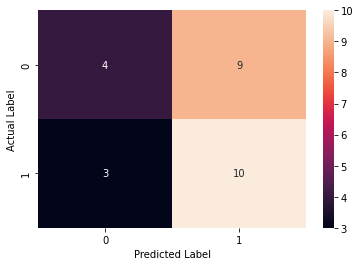

In [33]:
tree = DecisionTreeClassifier(criterion="entropy",
                             splitter="random",
                             max_depth=4)
tree =tree.fit(X_train, y_train)
y_pred_dt=tree.predict(X_test)



resultsReport(y_test, y_pred_dt)

### 6. Random Forest

F1 Score  0.5517241379310345
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



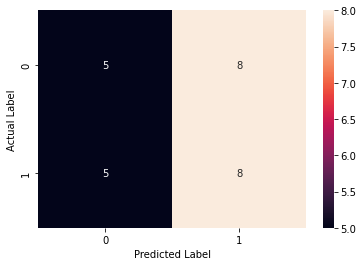

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Create Random Forest classifier with default parameters
clf = RandomForestClassifier(n_estimators=8)
                             

# Fit model to the train set
clf.fit(X_train, y_train)

# Predict values from the test set
y_predict= clf.predict(X_test)

resultsReport(y_test, y_predict)

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create parameters list
param_dist = {'n_estimators':[200,300], 
              'max_depth':[6,8], 
              'min_samples_leaf':[0.1,0.2], 
              'max_features':['log2','sqrt']}

# Create Random Forest classifier for Grid Search and fit it to train set
tree_clf = RandomForestClassifier()
tree_cv = GridSearchCV(tree_clf, param_dist, cv = 3, verbose = 1, scoring = 'accuracy',n_jobs = 4)
tree_cv.fit(X_train, y_train)

# Print parameters of the model
print(tree_cv.best_params_)
print(tree_cv.best_score_)
print(tree_cv.best_estimator_)

# Print accuracy score of the model to test set
y_pred = tree_cv.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_predict),2)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 200}
0.6295306001188354
RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=0.1,
                       n_estimators=200)

Accuracy score to test set: 0.5



In [38]:
from sklearn.model_selection import cross_val_predict

predicted_y = cross_val_predict(KNN, X, y, cv=10)
print(predicted_y)

[0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1]


**Support Vector Machine (SVM)** give the highest accuracy and F1 scores, so I chose this model.





Accuracy score to test set: 0.77

F1 Score  0.8000000000000002
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



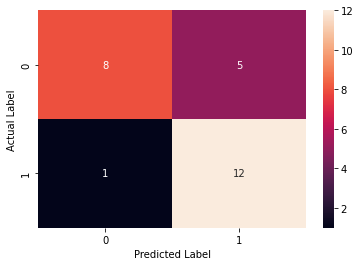

In [39]:
SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])

# train the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# preditc the data
y_pred_svm =SVM_clf.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm),2)))
resultsReport(y_test, y_pred_svm)

### Finding feature importances

In [40]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures =SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)

In [41]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns =pd.DataFrame(X.columns)

In [42]:
featureScores =pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns= ["Specs", "Score"]

featureScores

,Specs,Score
0,onTime,1.449041
1,expectedContents,0.036161
2,allOrdered,0.900104
3,goodPrice,0.106194
4,orderSatisfication,2.273286
5,easyOrdering,0.541070


happinessStatus       1.000000
onTime                0.280160
orderSatisfication    0.224522
easyOrdering          0.167669
allOrdered            0.150838
goodPrice             0.064415
expectedContents     -0.024274
Name: happinessStatus, dtype: float64


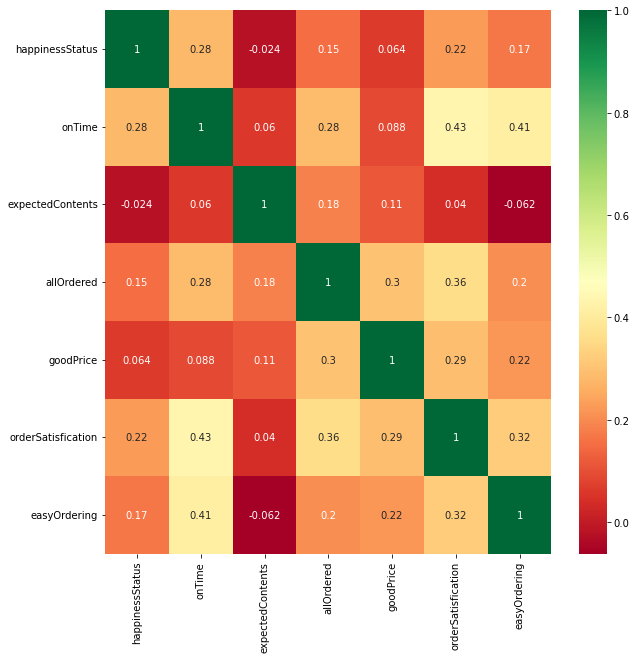

In [43]:
import seaborn as sns

corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
# plot heatmap
g =sns.heatmap(data[top_corr_features].corr(), annot=True, cmap ="RdYlGn")
print(corrmat['happinessStatus'].sort_values(ascending=False))

### Conclusion


**Support Vector Machine (SVM)** gave the highest accuracy **0.77** and F1 scores **0.80**, so I chose this model.


From the correlation heatmap the features correlation to happinessStatus are ranked: 
   1. onTime, 
   2. orderSatisfication,
   3. easyOrdering,
   4. allOrdered, 
   5. goodPrice, 
   6. expectedContents. 
The elimination of features from the model decreased the accuracy.


From the permutation ranking of feature importance the features are ranked: 
   1. onTime, 
   2. expectedContents, 
   3. allOrdered, 
   4. orderSatisfaction, 
   5. goodPrice, 
   6. easyOrdering.

